In [61]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from ssl_gumbel_fc import SSL_Encoder1, SSL_Encoder2, SSL_Decoder
from ssl_gumbel import SSL_Gumbel
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
def split_data(dataset, num_labeled):
    """
    Split dataset into two datasets
    """
    n = dataset.num_examples
    x, y = dataset.next_batch(n)
    x1 = x[xrange(num_labeled),:]
    y1 = y[xrange(num_labeled),:]
    x2 = x[xrange(num_labeled, n),:]
    y2 = y[xrange(num_labeled, n),:]
    d1 = DataSet(x1, y1, dtype=dtypes.float32, reshape=False)
    d2 = DataSet(x2, y2, dtype=dtypes.float32, reshape=False)
    return d1, d2

In [64]:
# Split dataset into labeled and unlabeled
num_labeled = 50000
labeled, unlabeled = split_data(mnist.train, num_labeled)
_, y = labeled.next_batch(num_labeled)
print np.sum(y, axis=0)

[ 4955.  5649.  4977.  5129.  4808.  4529.  4935.  5152.  4895.  4971.]


In [65]:
tf.reset_default_graph()

In [66]:
# Train
sess = tf.InteractiveSession()
build_encoder1 = SSL_Encoder1()
build_encoder2 = SSL_Encoder2()
build_decoder = SSL_Decoder()

In [67]:
sess = tf.InteractiveSession()
model = SSL_Gumbel(sess, build_encoder1, build_encoder2, build_decoder, labeled, unlabeled,
                  num_epochs=10, learning_rate = 1e-3, lr_decay=1., alpha=1.)

In [75]:
model.train()

Epoch 1 loss: 882.24002948
Epoch 2 loss: 878.019571472
Epoch 3 loss: 874.704257935
Epoch 4 loss: 872.057999573
Epoch 5 loss: 870.214398865
Epoch 6 loss: 868.69685199
Epoch 7 loss: 867.370765991
Epoch 8 loss: 866.422199158
Epoch 9 loss: 865.429597778
Epoch 10 loss: 864.921922302


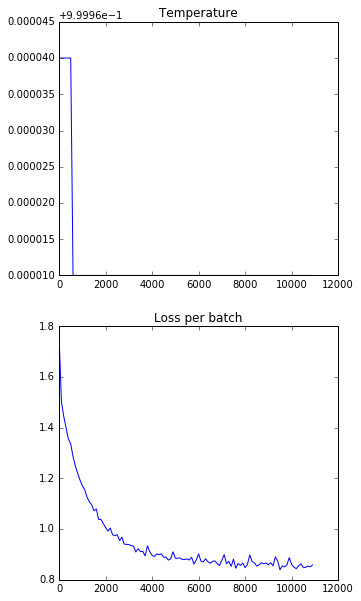

[ 1.       1.       1.       1.       1.       1.       0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997  0.99997
  0.99997  0.99997  0.99997  0.99997  0.99997  0.99

In [77]:
log = model.log
log = np.array(log).T
plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.plot(log[0,], log[1,])
plt.title('Temperature')
plt.subplot(2,1,2)
plt.plot(log[0,], log[2,])
plt.title('Loss per batch')
plt.show()
print log[1,]

In [70]:
#Load
"""
sess = tf.InteractiveSession()
build_encoder1 = SSL_Encoder1(500)
build_encoder2 = SSL_Encoder2(500)
build_decoder = SSL_Decoder(500)

model = SSL_M2(sess, build_encoder1, build_encoder2, build_decoder, labeled, unlabeled,
            batch_size = 100, z_dim = 50, x_dim = 784, y_dim=10, alpha=55000./10,
           learning_rate = 1e-3, num_epochs = 20, load=True,
        load_file = "checkpoints/SSL_M2_checkpoint_600"
              )
"""

'\nsess = tf.InteractiveSession()\nbuild_encoder1 = SSL_Encoder1(500)\nbuild_encoder2 = SSL_Encoder2(500)\nbuild_decoder = SSL_Decoder(500)\n\nmodel = SSL_M2(sess, build_encoder1, build_encoder2, build_decoder, labeled, unlabeled,\n            batch_size = 100, z_dim = 50, x_dim = 784, y_dim=10, alpha=55000./10,\n           learning_rate = 1e-3, num_epochs = 20, load=True,\n        load_file = "checkpoints/SSL_M2_checkpoint_600"\n              )\n'

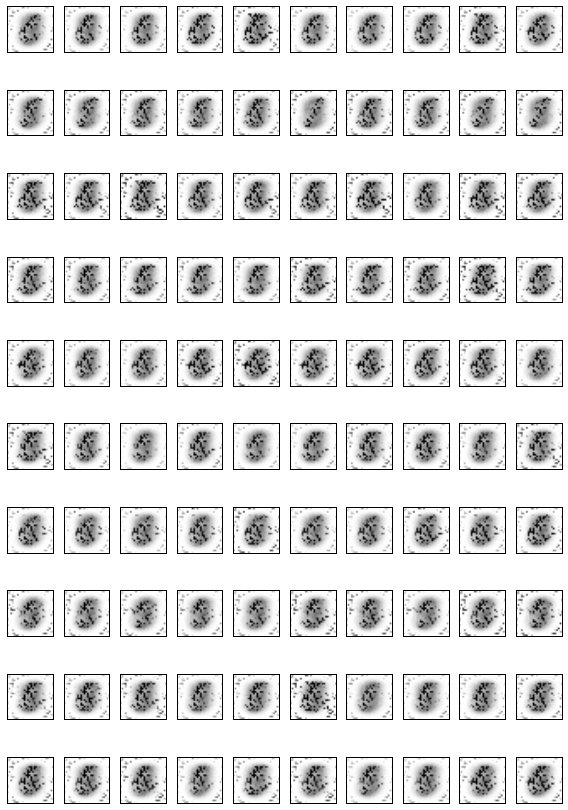

In [78]:
#images, info = mnist.test.next_batch(100)
num_examples = 10
batch_size = 100

labels = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=batch_size, labels=labels)


plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [72]:
# Classify validation images
batch_size = 100
num_val = mnist.validation.num_examples
tot = 0
for t in xrange(num_val / batch_size):
    x_val, y_val = mnist.validation.next_batch(batch_size)
    y_pred = model.classify(x_val)
    y_val = np.argmax(y_val, axis=1)
    tot += np.sum(y_pred != y_val)
print "Error: {}".format(float(tot)/num_val)
#with open("SSL_errors/SSL_err_600.txt", "w") as text_file:
    #text_file.write("Validation error: {}\n".format(float(tot)/num_val))

Error: 0.7808


In [73]:
# Classify test images
batch_size = 100
num_test = mnist.test.num_examples
tot = 0
for t in xrange(num_test / batch_size):
    x_test, y_test = mnist.test.next_batch(batch_size)
    y_pred = model.classify(x_test)
    y_test = np.argmax(y_test, axis=1)
    tot += np.sum(y_pred != y_test)
print "Error: {}".format(float(tot)/num_test)
#with open("SSL_errors/SSL_err_600.txt", "a") as text_file:
    #text_file.write("Test error: {}".format(float(tot)/num_test))

Error: 0.7703


In [29]:
sess.close()

In [ ]:
# as the number of labeled examples decreases, need alpha to decrease as well